# Speech Emotion Recognition Version 3

In [73]:

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys
import glob 
import warnings
import keras
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv2D, Conv1D, MaxPooling2D, AveragePooling1D
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras import regularizers
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.contrib.tensor_forest.python import tensor_forest
from tensorflow.python.ops import resources
from tqdm import tqdm
from matplotlib.pyplot import specgram
from typing import Tuple
# import scipy.io.wavfile as wav
# from speechpy.feature import mfcc
warnings.filterwarnings("ignore")

In [104]:
dataList = os.listdir('data2/')


In [105]:
classLabels = ('Angry', 'Fear', 'Disgust', 'Happy', 'Sad', 'Surprised', 'Neutral')

In [106]:
data = []
labels = []
names = []

In [108]:
for number, path in enumerate(tqdm(dataList)):
    X, sample_rate = librosa.load('data2/'+path, res_type='kaiser_best',duration=2.5,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=39)
    feature = mfccs
    data.append(feature)
    
    if path[6:8] == '01' or path[0:1] == 'n':
        labels.append(6)
    if path[6:8] == '02':
        labels.append(6)
    if path[6:8] == '03' or path[0:1] == 'h':
        labels.append(3)
    if path[6:8] == '04' or path[0:2] == 'sa':
        labels.append(4)
    if path[6:8] == '05' or path[0:1] == 'a':
        labels.append(0)
    if path[6:8] == '06' or path[0:1] == 'f':
        labels.append(1)
    if path[6:8] == '07' or path[0:1] == 'd':
        labels.append(2)
    if path[6:8] == '08' or path[0:2] == 'su':
        labels.append(5)
    
    
    names.append(path)
#     break

100%|██████████| 1440/1440 [02:18<00:00, 11.01it/s]


In [109]:
feature.shape

(39, 216)

In [121]:
DATA = np.zeros((1440,39,216))

In [122]:
for i in tqdm(range(0, 1439)):
    for j in range(0, 39):
        for k in range(0, 216):
#             print(i)
#             print(j)
#             print(k)
            temp = data[i]
            temp2 = temp[j]
            if (k >= len(temp2)):
                continue
            else:
                temp3 = temp2[k]
            DATA[i][j][k] = float(temp3)



  0%|          | 0/1439 [00:00<?, ?it/s]

  1%|          | 13/1439 [00:00<00:11, 119.33it/s]

  2%|▏         | 26/1439 [00:00<00:11, 118.10it/s]

  3%|▎         | 39/1439 [00:00<00:11, 119.52it/s]

  4%|▎         | 51/1439 [00:00<00:11, 117.73it/s]

  4%|▍         | 64/1439 [00:00<00:11, 119.66it/s]

  5%|▌         | 78/1439 [00:00<00:11, 121.08it/s]

  6%|▋         | 91/1439 [00:00<00:11, 119.36it/s]

  7%|▋         | 104/1439 [00:00<00:11, 117.95it/s]

  8%|▊         | 117/1439 [00:00<00:11, 118.48it/s]

  9%|▉         | 130/1439 [00:01<00:10, 119.05it/s]

 10%|▉         | 143/1439 [00:01<00:10, 119.43it/s]

 11%|█         | 156/1439 [00:01<00:10, 118.98it/s]

 12%|█▏        | 168/1439 [00:01<00:10, 116.75it/s]

 13%|█▎        | 180/1439 [00:01<00:10, 116.06it/s]

 13%|█▎        | 194/1439 [00:01<00:10, 118.97it/s]

 14%|█▍        | 207/1439 [00:01<00:10, 118.28it/s]

 15%|█▌        | 219/1439 [00:01<00:10, 111.95it/s]

 16%|█▌        | 231/1439 [00:01<00:10, 113.04it/s]

 17%|█▋  

In [123]:
DATA = np.array(DATA)
DATA.shape

(1440, 39, 216)

In [124]:
labels = np.array(labels)
len(labels)

1440

In [125]:
X_train, X_test, Y_train, Y_test = train_test_split(DATA, labels, test_size=0.3, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)

Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [126]:
numLabels = len(classLabels)

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [127]:
in_shape = X_train[0].shape
X_train = X_train.reshape(X_train.shape[0], in_shape[0], in_shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], in_shape[0], in_shape[1], 1)

In [128]:
in_shape

(39, 216)

In [129]:
model = Sequential()
model.add(Conv2D(8, (13, 13), input_shape=(in_shape[0], in_shape[1], 1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(8, (13, 13)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Conv2D(8, (3, 3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(Conv2D(8, (1, 1)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Flatten())
model.add(Dense(64))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(numLabels, activation = 'softmax'))

W0513 01:11:39.018074 18248 deprecation_wrapper.py:119] From C:\Users\samya\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4070: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [131]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 27, 204, 8)        1360      
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 204, 8)        32        
_________________________________________________________________
activation_1 (Activation)    (None, 27, 204, 8)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 192, 8)        10824     
_________________________________________________________________
batch_normalization_2 (Batch (None, 15, 192, 8)        32        
_________________________________________________________________
activation_2 (Activation)    (None, 15, 192, 8)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 192, 8)        

In [132]:
model.compile(loss='binary_crossentropy', optimizer='adam',
                           metrics=['accuracy'])


In [134]:
sam = model.fit(X_train, Y_train, batch_size=32, epochs=50)

Epoch 1/50
1008/1008 [==============================] - ETA: 32s - loss: 0.3655 - accuracy: 0.870 - ETA: 24s - loss: 0.3474 - accuracy: 0.875 - ETA: 21s - loss: 0.3309 - accuracy: 0.873 - ETA: 19s - loss: 0.3211 - accuracy: 0.879 - ETA: 18s - loss: 0.3152 - accuracy: 0.878 - ETA: 17s - loss: 0.3092 - accuracy: 0.882 - ETA: 16s - loss: 0.3071 - accuracy: 0.883 - ETA: 15s - loss: 0.3008 - accuracy: 0.883 - ETA: 14s - loss: 0.3001 - accuracy: 0.885 - ETA: 15s - loss: 0.2973 - accuracy: 0.885 - ETA: 14s - loss: 0.2937 - accuracy: 0.888 - ETA: 13s - loss: 0.2976 - accuracy: 0.885 - ETA: 12s - loss: 0.2970 - accuracy: 0.885 - ETA: 11s - loss: 0.2963 - accuracy: 0.884 - ETA: 10s - loss: 0.2953 - accuracy: 0.883 - ETA: 10s - loss: 0.2923 - accuracy: 0.885 - ETA: 9s - loss: 0.2914 - accuracy: 0.886 - ETA: 8s - loss: 0.2934 - accuracy: 0.88 - ETA: 8s - loss: 0.2937 - accuracy: 0.88 - ETA: 7s - loss: 0.2911 - accuracy: 0.88 - ETA: 7s - loss: 0.2900 - accuracy: 0.88 - ETA: 6s - loss: 0.2887 - accu

1008/1008 [==============================] - ETA: 23s - loss: 0.1220 - accuracy: 0.964 - ETA: 21s - loss: 0.1191 - accuracy: 0.962 - ETA: 20s - loss: 0.1085 - accuracy: 0.970 - ETA: 23s - loss: 0.0967 - accuracy: 0.974 - ETA: 21s - loss: 0.0890 - accuracy: 0.977 - ETA: 19s - loss: 0.0862 - accuracy: 0.978 - ETA: 18s - loss: 0.0838 - accuracy: 0.979 - ETA: 17s - loss: 0.0823 - accuracy: 0.979 - ETA: 16s - loss: 0.0815 - accuracy: 0.980 - ETA: 15s - loss: 0.0796 - accuracy: 0.980 - ETA: 14s - loss: 0.0799 - accuracy: 0.980 - ETA: 13s - loss: 0.0783 - accuracy: 0.980 - ETA: 13s - loss: 0.0779 - accuracy: 0.980 - ETA: 12s - loss: 0.0769 - accuracy: 0.981 - ETA: 12s - loss: 0.0766 - accuracy: 0.981 - ETA: 11s - loss: 0.0764 - accuracy: 0.981 - ETA: 10s - loss: 0.0763 - accuracy: 0.981 - ETA: 9s - loss: 0.0757 - accuracy: 0.982 - ETA: 8s - loss: 0.0750 - accuracy: 0.98 - ETA: 8s - loss: 0.0744 - accuracy: 0.98 - ETA: 7s - loss: 0.0763 - accuracy: 0.98 - ETA: 6s - loss: 0.0763 - accuracy: 0.9

1008/1008 [==============================] - ETA: 16s - loss: 0.0122 - accuracy: 1.000 - ETA: 16s - loss: 0.0213 - accuracy: 0.995 - ETA: 16s - loss: 0.0190 - accuracy: 0.997 - ETA: 18s - loss: 0.0180 - accuracy: 0.997 - ETA: 18s - loss: 0.0187 - accuracy: 0.998 - ETA: 17s - loss: 0.0175 - accuracy: 0.998 - ETA: 16s - loss: 0.0165 - accuracy: 0.998 - ETA: 15s - loss: 0.0175 - accuracy: 0.998 - ETA: 15s - loss: 0.0175 - accuracy: 0.999 - ETA: 14s - loss: 0.0172 - accuracy: 0.999 - ETA: 13s - loss: 0.0174 - accuracy: 0.999 - ETA: 12s - loss: 0.0179 - accuracy: 0.999 - ETA: 12s - loss: 0.0175 - accuracy: 0.999 - ETA: 12s - loss: 0.0176 - accuracy: 0.999 - ETA: 11s - loss: 0.0172 - accuracy: 0.999 - ETA: 10s - loss: 0.0170 - accuracy: 0.999 - ETA: 9s - loss: 0.0174 - accuracy: 0.998 - ETA: 9s - loss: 0.0171 - accuracy: 0.99 - ETA: 8s - loss: 0.0174 - accuracy: 0.99 - ETA: 7s - loss: 0.0175 - accuracy: 0.99 - ETA: 7s - loss: 0.0178 - accuracy: 0.99 - ETA: 6s - loss: 0.0179 - accuracy: 0.99 

1008/1008 [==============================] - ETA: 18s - loss: 0.0068 - accuracy: 1.000 - ETA: 17s - loss: 0.0072 - accuracy: 1.000 - ETA: 16s - loss: 0.0059 - accuracy: 1.000 - ETA: 15s - loss: 0.0059 - accuracy: 1.000 - ETA: 15s - loss: 0.0065 - accuracy: 1.000 - ETA: 14s - loss: 0.0071 - accuracy: 1.000 - ETA: 13s - loss: 0.0073 - accuracy: 1.000 - ETA: 13s - loss: 0.0072 - accuracy: 1.000 - ETA: 12s - loss: 0.0070 - accuracy: 1.000 - ETA: 12s - loss: 0.0071 - accuracy: 1.000 - ETA: 12s - loss: 0.0075 - accuracy: 1.000 - ETA: 12s - loss: 0.0075 - accuracy: 1.000 - ETA: 11s - loss: 0.0079 - accuracy: 1.000 - ETA: 10s - loss: 0.0078 - accuracy: 1.000 - ETA: 10s - loss: 0.0076 - accuracy: 1.000 - ETA: 9s - loss: 0.0074 - accuracy: 1.000 - ETA: 8s - loss: 0.0073 - accuracy: 1.00 - ETA: 8s - loss: 0.0072 - accuracy: 1.00 - ETA: 7s - loss: 0.0073 - accuracy: 1.00 - ETA: 7s - loss: 0.0073 - accuracy: 1.00 - ETA: 6s - loss: 0.0072 - accuracy: 1.00 - ETA: 6s - loss: 0.0070 - accuracy: 1.00 - 

1008/1008 [==============================] - ETA: 19s - loss: 0.0030 - accuracy: 1.000 - ETA: 24s - loss: 0.0028 - accuracy: 1.000 - ETA: 21s - loss: 0.0032 - accuracy: 1.000 - ETA: 19s - loss: 0.0040 - accuracy: 1.000 - ETA: 17s - loss: 0.0042 - accuracy: 1.000 - ETA: 16s - loss: 0.0039 - accuracy: 1.000 - ETA: 15s - loss: 0.0041 - accuracy: 1.000 - ETA: 14s - loss: 0.0040 - accuracy: 1.000 - ETA: 13s - loss: 0.0038 - accuracy: 1.000 - ETA: 12s - loss: 0.0038 - accuracy: 1.000 - ETA: 12s - loss: 0.0039 - accuracy: 1.000 - ETA: 12s - loss: 0.0040 - accuracy: 1.000 - ETA: 11s - loss: 0.0041 - accuracy: 1.000 - ETA: 11s - loss: 0.0041 - accuracy: 1.000 - ETA: 10s - loss: 0.0043 - accuracy: 1.000 - ETA: 9s - loss: 0.0042 - accuracy: 1.000 - ETA: 9s - loss: 0.0043 - accuracy: 1.00 - ETA: 8s - loss: 0.0045 - accuracy: 1.00 - ETA: 7s - loss: 0.0044 - accuracy: 1.00 - ETA: 7s - loss: 0.0045 - accuracy: 1.00 - ETA: 6s - loss: 0.0047 - accuracy: 1.00 - ETA: 6s - loss: 0.0048 - accuracy: 1.00 - 

1008/1008 [==============================] - ETA: 16s - loss: 0.0086 - accuracy: 1.000 - ETA: 15s - loss: 0.0061 - accuracy: 1.000 - ETA: 15s - loss: 0.0073 - accuracy: 1.000 - ETA: 14s - loss: 0.0069 - accuracy: 1.000 - ETA: 14s - loss: 0.0064 - accuracy: 1.000 - ETA: 13s - loss: 0.0063 - accuracy: 1.000 - ETA: 13s - loss: 0.0066 - accuracy: 1.000 - ETA: 13s - loss: 0.0065 - accuracy: 1.000 - ETA: 13s - loss: 0.0062 - accuracy: 1.000 - ETA: 13s - loss: 0.0060 - accuracy: 1.000 - ETA: 12s - loss: 0.0061 - accuracy: 1.000 - ETA: 11s - loss: 0.0063 - accuracy: 1.000 - ETA: 11s - loss: 0.0062 - accuracy: 1.000 - ETA: 10s - loss: 0.0061 - accuracy: 1.000 - ETA: 9s - loss: 0.0061 - accuracy: 1.000 - ETA: 9s - loss: 0.0059 - accuracy: 1.00 - ETA: 8s - loss: 0.0059 - accuracy: 1.00 - ETA: 8s - loss: 0.0057 - accuracy: 1.00 - ETA: 7s - loss: 0.0057 - accuracy: 1.00 - ETA: 7s - loss: 0.0056 - accuracy: 1.00 - ETA: 6s - loss: 0.0058 - accuracy: 1.00 - ETA: 5s - loss: 0.0058 - accuracy: 1.00 - ET

1008/1008 [==============================] - ETA: 17s - loss: 0.0404 - accuracy: 0.982 - ETA: 16s - loss: 0.0432 - accuracy: 0.982 - ETA: 16s - loss: 0.0400 - accuracy: 0.985 - ETA: 15s - loss: 0.0383 - accuracy: 0.986 - ETA: 15s - loss: 0.0356 - accuracy: 0.987 - ETA: 14s - loss: 0.0342 - accuracy: 0.988 - ETA: 14s - loss: 0.0333 - accuracy: 0.989 - ETA: 13s - loss: 0.0406 - accuracy: 0.987 - ETA: 13s - loss: 0.0399 - accuracy: 0.987 - ETA: 13s - loss: 0.0376 - accuracy: 0.988 - ETA: 13s - loss: 0.0358 - accuracy: 0.989 - ETA: 12s - loss: 0.0345 - accuracy: 0.990 - ETA: 11s - loss: 0.0349 - accuracy: 0.990 - ETA: 10s - loss: 0.0350 - accuracy: 0.990 - ETA: 10s - loss: 0.0360 - accuracy: 0.989 - ETA: 9s - loss: 0.0370 - accuracy: 0.988 - ETA: 8s - loss: 0.0366 - accuracy: 0.98 - ETA: 8s - loss: 0.0365 - accuracy: 0.98 - ETA: 8s - loss: 0.0365 - accuracy: 0.98 - ETA: 7s - loss: 0.0367 - accuracy: 0.98 - ETA: 6s - loss: 0.0369 - accuracy: 0.98 - ETA: 6s - loss: 0.0362 - accuracy: 0.98 - 

1008/1008 [==============================] - ETA: 17s - loss: 0.0042 - accuracy: 1.000 - ETA: 17s - loss: 0.0038 - accuracy: 1.000 - ETA: 16s - loss: 0.0047 - accuracy: 1.000 - ETA: 16s - loss: 0.0081 - accuracy: 0.997 - ETA: 15s - loss: 0.0069 - accuracy: 0.998 - ETA: 14s - loss: 0.0063 - accuracy: 0.998 - ETA: 13s - loss: 0.0065 - accuracy: 0.998 - ETA: 13s - loss: 0.0063 - accuracy: 0.998 - ETA: 12s - loss: 0.0058 - accuracy: 0.999 - ETA: 13s - loss: 0.0057 - accuracy: 0.999 - ETA: 12s - loss: 0.0059 - accuracy: 0.999 - ETA: 12s - loss: 0.0057 - accuracy: 0.999 - ETA: 11s - loss: 0.0056 - accuracy: 0.999 - ETA: 10s - loss: 0.0057 - accuracy: 0.999 - ETA: 10s - loss: 0.0057 - accuracy: 0.999 - ETA: 9s - loss: 0.0055 - accuracy: 0.999 - ETA: 8s - loss: 0.0058 - accuracy: 0.99 - ETA: 8s - loss: 0.0057 - accuracy: 0.99 - ETA: 7s - loss: 0.0056 - accuracy: 0.99 - ETA: 6s - loss: 0.0054 - accuracy: 0.99 - ETA: 6s - loss: 0.0053 - accuracy: 0.99 - ETA: 5s - loss: 0.0051 - accuracy: 0.99 - 

1008/1008 [==============================] - ETA: 17s - loss: 0.0025 - accuracy: 1.000 - ETA: 19s - loss: 0.0095 - accuracy: 0.997 - ETA: 18s - loss: 0.0074 - accuracy: 0.998 - ETA: 17s - loss: 0.0059 - accuracy: 0.998 - ETA: 18s - loss: 0.0048 - accuracy: 0.999 - ETA: 18s - loss: 0.0045 - accuracy: 0.999 - ETA: 17s - loss: 0.0043 - accuracy: 0.999 - ETA: 16s - loss: 0.0039 - accuracy: 0.999 - ETA: 15s - loss: 0.0038 - accuracy: 0.999 - ETA: 14s - loss: 0.0036 - accuracy: 0.999 - ETA: 13s - loss: 0.0033 - accuracy: 0.999 - ETA: 12s - loss: 0.0033 - accuracy: 0.999 - ETA: 12s - loss: 0.0031 - accuracy: 0.999 - ETA: 11s - loss: 0.0030 - accuracy: 0.999 - ETA: 11s - loss: 0.0029 - accuracy: 0.999 - ETA: 10s - loss: 0.0028 - accuracy: 0.999 - ETA: 9s - loss: 0.0027 - accuracy: 0.999 - ETA: 9s - loss: 0.0028 - accuracy: 0.99 - ETA: 8s - loss: 0.0027 - accuracy: 0.99 - ETA: 7s - loss: 0.0027 - accuracy: 0.99 - ETA: 6s - loss: 0.0026 - accuracy: 0.99 - ETA: 6s - loss: 0.0026 - accuracy: 0.99 

1008/1008 [==============================] - ETA: 17s - loss: 0.0024 - accuracy: 1.000 - ETA: 17s - loss: 0.0032 - accuracy: 1.000 - ETA: 16s - loss: 0.0026 - accuracy: 1.000 - ETA: 15s - loss: 0.0023 - accuracy: 1.000 - ETA: 15s - loss: 0.0021 - accuracy: 1.000 - ETA: 14s - loss: 0.0019 - accuracy: 1.000 - ETA: 15s - loss: 0.0018 - accuracy: 1.000 - ETA: 15s - loss: 0.0017 - accuracy: 1.000 - ETA: 14s - loss: 0.0017 - accuracy: 1.000 - ETA: 13s - loss: 0.0017 - accuracy: 1.000 - ETA: 13s - loss: 0.0017 - accuracy: 1.000 - ETA: 12s - loss: 0.0016 - accuracy: 1.000 - ETA: 11s - loss: 0.0017 - accuracy: 1.000 - ETA: 11s - loss: 0.0018 - accuracy: 1.000 - ETA: 10s - loss: 0.0019 - accuracy: 1.000 - ETA: 10s - loss: 0.0019 - accuracy: 1.000 - ETA: 9s - loss: 0.0018 - accuracy: 1.000 - ETA: 9s - loss: 0.0018 - accuracy: 1.00 - ETA: 8s - loss: 0.0017 - accuracy: 1.00 - ETA: 7s - loss: 0.0017 - accuracy: 1.00 - ETA: 7s - loss: 0.0016 - accuracy: 1.00 - ETA: 6s - loss: 0.0016 - accuracy: 1.00 

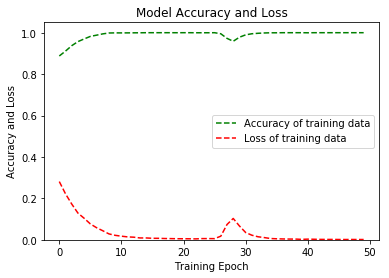

In [135]:
plt.figure(figsize=(6, 4))
plt.plot(sam.history['accuracy'], "g--", label="Accuracy of training data")
plt.plot(sam.history['loss'], "r--", label="Loss of training data")
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [139]:
model.evaluate(X_test, Y_test)

432/432 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 4ms/step


[0.438615341981252, 0.858134925365448]

# Testing Accuracy of 85.81 %